<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Green_Belt/2-Measure/DistribuicaoEstatistica/Gr%C3%A1fico_U.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neste Notebook, nosso objetivo é entender como aplicar o Gráfico U.
### 1 - Quais situações são recomendadas a sua utilização;
#### Quando se deseja monitorar a quantidade de defeitos por unidade em processos com inspeção variável por unidade (ex: defeitos por página, falhas por linha de código).
### 2 - Com quais tipos de variáveis devemos trabalhar nesse tipo de gráfico;
#### Variável discreta, contagem de defeitos por unidade (uma unidade pode ter mais de um defeito).
### 3 - Como construir o gráfico;
#### - Calcule a taxa de defeitos por unidade (ex: 5 defeitos em 2 peças = 2,5).
#### -Linha central = média da taxa U.
#### -Limites de controle ajustados ao tamanho da amostra (quanto mais inspeções, mais estreitos os limites).
### 4 - Como explicar o gráfico;
#### Mostra quanto de defeito ocorre proporcionalmente ao tamanho da amostra, sendo flexível para variações de inspeção. Ideal quando a quantidade de "oportunidades" muda.

#### 📌 "É como medir quantos furos tem a peneira, mesmo que cada peneira tenha tamanhos diferentes. Aqui a análise é proporcional, não absoluta."

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://github.com/moises-rb/Analise_Dados/blob/main/Green_Belt/2-Measure/DistribuicaoEstatistica/base_dados/Green_Belt_FM2S_Demo_4.xlsx?raw=True'
dados = pd.read_excel(url)
dados.head()

,Data,Quantidade produzida (kg),Estágio
0,1990-02-01,237.743019,A
1,1990-02-02,254.922399,A
2,1990-02-03,246.850588,A
3,1990-02-04,257.094066,A
4,1990-02-05,226.468559,A


In [3]:
# Aqui o Pandas "prepara" o arquivo para ver as abas
excel_file = pd.ExcelFile(url)
nomes_das_abas = excel_file.sheet_names
print(nomes_das_abas)

['GC - Var. Contínuas', 'GC - Var. Contagem', 'GC - Var. Categóricas']


In [ ]:
# Lendo a primeira aba da planilha
dados_aba2 = pd.read_excel(url, sheet_name=nomes_das_abas[1]) # podemos ler assim também: dados_aba1 = pd.read_excel(url, sheet_name='GC - Var. Contagem')
dados_aba2.head()

,Ciclo,Unidades Amostradas,Defeitos
0,1,200,25
1,2,180,27
2,3,180,29
3,4,170,30
4,5,200,15


In [5]:
# Calcular a taxa de defeitos (U)
dados_aba2['U'] = dados_aba2['Defeitos'] / dados_aba2['Unidades Amostradas']

# Calcular a média de U (Linha Central - CL)
cl = dados_aba2['U'].mean()

# Calcular os Limites de Controle Superior (LSC) e Inferior (LIC)
# A fórmula para os limites de controle do Gráfico U é um pouco mais complexa
# e depende do número de unidades amostradas em cada ponto.
# LSC/LIC = CL ± 3 * sqrt(CL / n)
# Onde 'n' é o número de unidades amostradas para cada ciclo.

# Criar uma coluna para os limites de controle, pois eles podem variar por ciclo
dados_aba2['LSC'] = cl + 3 * (cl / dados_aba2['Unidades Amostradas'])**0.5
dados_aba2['LIC'] = cl - 3 * (cl / dados_aba2['Unidades Amostradas'])**0.5

# Garantir que o LIC não seja negativo
dados_aba2['LIC'] = dados_aba2['LIC'].apply(lambda x: max(0, x))

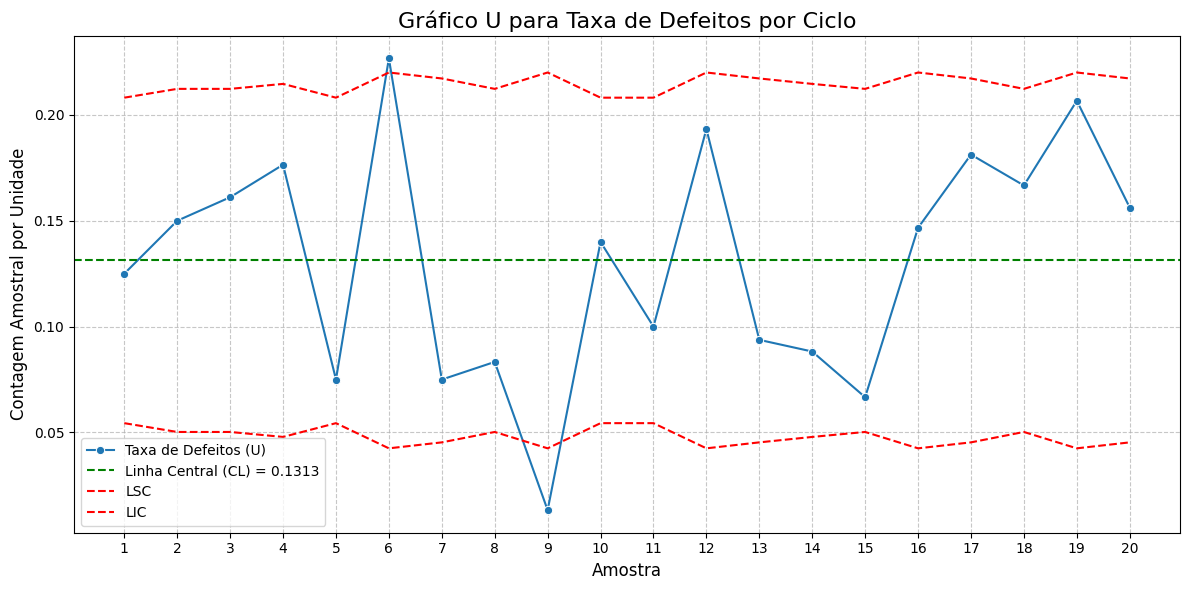

In [8]:
# Configurações de estilo para o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='Ciclo', y='U', data=dados_aba2, marker='o', label='Taxa de Defeitos (U)')

# Linha Central (CL)
plt.axhline(y=cl, color='green', linestyle='--', label=f'Linha Central (CL) = {cl:.4f}')

# Limites de Controle Superior (LSC) e Inferior (LIC)
# Plotar LSC e LIC como linhas tracejadas que acompanham cada ponto
plt.plot(dados_aba2['Ciclo'], dados_aba2['LSC'], color='red', linestyle='--', label='LSC')
plt.plot(dados_aba2['Ciclo'], dados_aba2['LIC'], color='red', linestyle='--', label='LIC')

# Adicionar títulos e rótulos
plt.title('Gráfico U para Taxa de Defeitos por Ciclo', fontsize=16)
plt.xlabel('Amostra', fontsize=12)
plt.ylabel('Contagem Amostral por Unidade', fontsize=12)
plt.xticks(dados_aba2['Ciclo']) # Garante que todos os ciclos sejam exibidos no eixo x
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()